# Lecture Overview

- Preliminaries
    - bond-pricing package
    - isda_daycounters package
    

- Bond pricing review


- Pricing bonds on coupon days


- Evolution of bond prices over time
    - Discount vs Premium bonds
    - Pull to par


- Pricing bonds on non-coupon days

# 1. Preliminaries

There are several tools you can use to price bonds in Python. We will use **the "bond-pricing" package**. Before we proceed, please install this package by typing 

**pip install bond-pricing** 

in a Terminal or Anaconda Prompt.

We also need to install a package called "isda_daycounters" that is able to deal with the most common day-count conventions. To install this package, we first need to install git using 

**conda install git**

Now we can pip install the isda_daycounters package from source using 

**pip install git+https://github.com/jrvarma/isda_daycounters**


In [1]:
# Import packages
import bond_pricing.simple_bonds as bp
import pandas as pd
import numpy as np

# 2. Bond pricing review

Bond prices are calculated using the same general approach as the prices of any financial asset: they equal the discounted value of their future cash flows. 

$$P_t = \frac{C}{1+YTM} + \frac{C}{(1+YTM)^2} + ... + \frac{C + Par}{(1+YTM)^T} $$                    


where
- $P_t$ is the price of the bond at time $t$
- $C$ is the coupon payment of the bond
- $Par$ is the par value of the bond (also known as it face value)
- $T$ is the number of years left until maturity of the bond 
- $YTM$ is the yield to maturity of the bond (often simply called the yield of the bond)


For bonds that do not pay coupons (also known as **zero-coupon bonds** or "zeros"), the formula becomes


$$P_t = \frac{Par}{(1+YTM)^T} $$                    



**Caveat 1**: 

The formula above is only correct if the bond has a single coupon payment per year. If the bond pays "F" coupons per year (e.g. F = 2 for bond with semi-annual coupon payments) then the formula above becomes:

$$P_t = \frac{C/F}{1+YTM/F} + \frac{C/F}{(1+YTM/F)^2} + ... + \frac{C/F + Par}{(1+YTM/F)^{T \cdot F}} $$                    


**Caveat 2**:

The formula above is only valid on coupon-paying days (i.e. $t$ is immediately after a coupon is paid) or when the bond is issued. On any other day, we need to adjust the price for something called "accrued interest". We cover this in detail in section 4 below.


# 3. Pricing bonds on coupon days

To price bonds on coupon-paying days using the bond-pricing package, we use the "bond_price" function of the package with the following parameters:

- cpn  = Coupon rate in decimal (i.e. 6% is entered as 0.06 not 6)
- yld  = Yield to maturity in decimal
- freq = Number of coupon payments per year (you don't need to specify this parameter for zero coupon bonds)
- face = Par value of the bond
- mat = Maturity in years

**Example 1:**

Bond A just paid a coupon. It matures in one year, has par value of \\$1000, pays coupons semiannually (so it has 2 more coupon payments left) and has a coupon rate of 6\%. You know that it has a yield to maturity of 2\%. What is the price of the bond today?

In [17]:
# Calculate price
p = bp.bond_price(mat = 1, freq = 2, cpn = 0.06, yld = 0.02, face = 1000)
print("bond price = ", p)

bond price =  1039.4079011861584


#### Example 2:

Bond A matures in 10 years, and pays coupons annually. It has a coupon rate of 8%, a yield of 12%, and a par value of $100. What is the price of the bond today?

In [18]:
# Calculate price
p = bp.bond_price(mat = 10, freq = 1, cpn = 0.08, yld = 0.12, face = 100)
print("bond price = ", p)

bond price =  77.39910788635653


#### Example 3:

Bond A has 5 more payments left, and pays coupons semi-annually. It has a coupon rate of 8%, a yield of 12%, and a par value of $100. What is the price of the bond today?

In [4]:
# Calculate years left until maturity
payments_left = 5
payments_per_year = 2
years_to_maturity = payments_left / payments_per_year
print("years to maturity = ", years_to_maturity)

# Calculate price
p = bp.bond_price(mat = years_to_maturity, freq = payments_per_year, cpn = 0.08, yld = 0.12, face = 100)
print("bond price = ", p)

years to maturity =  2.5
bond price =  91.57527242886857


# 4. Evolution of bond prices over time

**Discount bonds** are bonds with a price lower than their par value. These are bonds where the yield to maturity is higher than the coupon rate (example 4 below). The price of these bonds increases over the lifetime of the bond until they reach par value at maturity (this process is called **"pull to par"**). This assumes that the YTM does not change during this time.

**Premium bonds** are bonds with a price higher than their par value. These are bonds where the YTM is lower than the coupon rate (example 5 below). Again, due to "pull to par", the price of these bonds decreases over time until it reaches par value at maturity.

**Par bonds** are bonds that trade at a price equal to their par value. The YTM of par bonds is equal to their coupon rate.

It is important to remember that the increase and decrease in bond prices caused by pull to par does not mean that these bonds have become more or less attractive over time. Nothing about these bonds changes other than time to maturity.

#### Example 4:

Bond A matures in 10 years and pays coupons quarterly. It has a coupon rate of 6%, a yield of 8%, and a face falue of $1000.
Calculate the price of the bond today, and on each coupon paying day (immediately after the coupon is paid) until the bond matures. Plot these prices over time.

In [5]:
# Bond inputs
T = 10
payments_per_year = 4
c = 0.06
y = 0.08
par = 1000

total_nr_payments = T * payments_per_year

In [6]:
# Create empty dataframe to record the prices
res = pd.DataFrame(np.nan, index = range(1+total_nr_payments), columns = ["Bond Price"])
#res

In [7]:
# Loop through payments left, and calculate prices at each point
for payment_nr in range(1+total_nr_payments):
    
    # Calculate maturity in years
    payments_left = total_nr_payments - payment_nr
    years_to_maturity = payments_left / payments_per_year
    
    # Calculate price and store it in the res table
    res.loc[payment_nr, 'Bond Price'] = bp.bond_price(mat = years_to_maturity, 
                                                      freq = payments_per_year, 
                                                      cpn = c, yld = y, face = par)
    

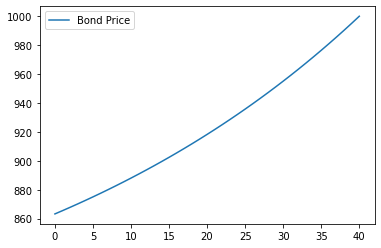

In [8]:
# Take a look at the results
res
res.plot();

#### Example 5:

Re-run the above example using a yield of 4%

# 5. Pricing bonds on non-coupon days

On non-coupon paying days, the bond pricing formula above fails because the distance to future payments can not be represented as a whole number anymore. The price is still the discounted value of future payments:


$$P_{t_0} = \frac{C}{(1+YTM)^{t_1}} + \frac{C}{(1+YTM)^{t_2}} + ... + \frac{C + Par}{(1+YTM)^{t_N}} $$                    

where
- $t_0$ is the time when the bond is being priced
- $t_1$ is the amount of time between $t_0$ and the first coupon payment
- $t_2$ is the amount of time between $t_0$ and the second coupon payment

...
- $t_N$ is the amount of time between $t_0$ and the last coupon payment


### 5.1. Day-counting conventions

A crucial question is: how should $t_1$, $t_2$,...,$t_N$ be calculated. The answer to this question can be different from bond to bond, depending on the day-counting convention used for that type of bond. The most common conventions are:

- 30/360 (assumes all months have 30 days and all years have 360 days)
    - most common for corporate bonds, municipal bonds and mortgage-backed securities


- Actual/360 (uses the actual number of days between dates, but assumes all years have 360 days)
    - most common for short-term securities like commercial paper and T-bills


- Actual/Actual (uses the actual number of days between dates, and the actual number of days in the year)
    - most common for Treasury Bonds


### 5.2. Clean vs dirty prices

The price given by the formula above is called the **dirty price** or **invoice price** of the bond. This is the price you actually have to pay if you buy the bond at $t_0$. 

The price that is quoted for the bond is called the **clean price** or **flat price** of the bond. This price differs from the dirty price by the amount of **accrued interest** of the bond since the last coupon payment.

$$Dirty Price = Clean Price + Accrued Interest$$

It is also important to remember that, bond prices are quoted as percentage of par. So a bond with par value of \\$1000 and a price of 103, actually has a clean price of $1030.

### 5.3. Using the bond-pricing package

To calculate these three quantities with the "bond-pricing" package, we use its "bond_price_breakup" function, and we provide the date when we are pricing the bond as the "settle" parameter, and the date when the bond matures as the "mat" parameter. To choose the day-counting convention, we use the "daycount" parameter (e.g. daycount = 'thirty/360', or daycount = 'actual/360', or daycount = 'actual/actual').

**Example 6:**

Bond A was issued on 'Jan-01-2016' and it matures in 'Jan-01-2017'. Coupons are paid semi-annualy, on July-01 and Jan-01. The coupon rate is 6%. Assume the yield to maturity is 8% throughout the lifetime of the bond. (when I do not specify the par value, assume that it is $1000).

1. What is the price of the bond on July-01-2016, immediately after the coupon is paid?

In [9]:
# Inputs
mat_date = '2017-01-01'
F = 2
coupon_rate = 0.06
ytm = 0.08
par = 1000

In [10]:
# Price bond on July-01-2016 by specifying maturity in years  (as above)
pjuly = bp.bond_price(mat = 1/2, freq = F, cpn = coupon_rate, yld = ytm, face = par)
pjuly

990.3846153846155

In [11]:
# Price bond on July-01-2016 by specifying pricing date for the "settle" parameter
pjuly2 = bp.bond_price(settle = '2016-07-01', mat = mat_date, freq = F,  
                   cpn = coupon_rate, yld = ytm, face = par)

print(f'bond price using mat as years = {pjuly2: .3f}', )

bond price using mat as years =  990.385


#### Example 6 (continued):

2. What is the price of the bond on June-30-2016?
    - Using 30/360 convention
    - Using Actual/360 convention
    - Using Actual/Actual convention

In [12]:
# Using 30/360
p1 = bp.bond_price_breakup(settle = '2016-06-30', mat = mat_date, yld = ytm,  
                       freq = F, cpn = coupon_rate, face = par, daycount = 'thirty/360')
p1

# Print just the dirty price
#print(p1['DirtyPrice'])

{'DirtyPrice': 1020.1623050925951,
 'AccruedInterest': 29.833333333333332,
 'CleanPrice': 990.3289717592618,
 'NextCoupon': Timestamp('2016-07-01 00:00:00'),
 'PreviousCoupon': Timestamp('2016-01-01 00:00:00')}

In [13]:
# Using Actual/360
p2 = bp.bond_price_breakup(settle = '2016-06-30', mat = mat_date, yld = ytm,  
                       freq = F, cpn = coupon_rate, face = par, daycount = 'actual/365')
p2

{'DirtyPrice': 1020.0557351448831,
 'AccruedInterest': 29.753424657534246,
 'CleanPrice': 990.3023104873488,
 'NextCoupon': Timestamp('2016-07-01 00:00:00'),
 'PreviousCoupon': Timestamp('2016-01-01 00:00:00')}

In [14]:
# Using Actual/Actual
p4 = bp.bond_price_breakup(settle = '2016-06-30', mat = mat_date, yld = ytm, 
                       freq = F, cpn = coupon_rate, face = 100, daycount = 'actual/actual')
p4

{'DirtyPrice': 101.99473297412712,
 'AccruedInterest': 2.9672131147540983,
 'CleanPrice': 99.02751985937302,
 'NextCoupon': Timestamp('2016-07-01 00:00:00'),
 'PreviousCoupon': Timestamp('2016-01-01 00:00:00')}

In [15]:
# Extract just the clean price and dirty price
pclean = p4['CleanPrice']
pdirty = p4['DirtyPrice']
print('Clean price = ', pclean)
print('Dirty price = ', pdirty)

Clean price =  99.02751985937302
Dirty price =  101.99473297412712


#### Example 7:

Bond A was issued on 'June-01-2019' and it matures in 'Jun-01-2029'. Coupons are paid semi-annualy. The coupon rate is 8% and the yield to maturity is 6%. Print just the clean price, accrued interest, and dirty price of the bond on Feb-01-2020. Use a 30/360 day count.

In [22]:
p = bp.bond_price_breakup(settle='2020-02-01', mat = '2029-06-01', 
                          freq = 2, cpn = 0.08, yld = 0.06, face = 1000, 
                          daycount = 'thirty/360')
print(p['CleanPrice'])
print(p['DirtyPrice'])
print(p['AccruedInterest'])
print(p)

1141.2245819488737
1154.5579152822072
13.333333333333332
{'DirtyPrice': 1154.5579152822072, 'AccruedInterest': 13.333333333333332, 'CleanPrice': 1141.2245819488737, 'NextCoupon': Timestamp('2020-06-01 00:00:00'), 'PreviousCoupon': Timestamp('2019-12-01 00:00:00')}


# 6. Resources


- bond-pricing package
    - https://bond-pricing.readthedocs.io/en/latest/
    
    
- isda_daycounters
    - https://github.com/miradulo/isda_daycounters
